Exercise 1

The command

ls -lS /usr/bin | grep '.* c.*'

will list all the files in the directory /usr/bin whose name starts with the letter c, including information such as permissions, ownership, site, creation time and name of each file, and will order them in the output from the biggest to the smallest.

Using the subprocess module, use the command above to obtain and then print the list of files in the /usr/bin directory. For instance, one file in the output might be represented as
-rwxr-xr-x 1 root root     43416 Sep  5  2019 cat

Parsing the output returned by subprocess, print the list of files for which the year is 2022.


In [1]:

import subprocess #import subprocess which allows us to write and execute shell's commands from Python. 

sp = subprocess.run('ls -lS /usr/bin | grep ".* c.*"', shell=True,capture_output=True, text=True)
print('The given shell command gives the following output:' + "\n",sp.stdout)

The given shell command gives the following output:
 -rwxr-xr-x 1 root root      303512 Jan 16  2023 cvtsudoers
-rwxr-xr-x 1 root root      141824 Feb  7  2022 cp
-rwxr-xr-x 1 root root      109056 Feb  7  2022 csplit
-rwxr-xr-x 1 root root      101368 Feb  9  2022 ctwill
-rwxr-xr-x 1 root root       97272 Feb  9  2022 cweave
-rwsr-xr-x 1 root root       72712 Nov 24  2022 chfn
-rwxr-sr-x 1 root shadow     72184 Nov 24  2022 chage
-rwxr-xr-x 1 root root       59904 Feb  7  2022 chcon
-rwxr-xr-x 1 root root       59904 Feb  7  2022 chown
-rwxr-xr-x 1 root root       55808 Feb  7  2022 chgrp
-rwxr-xr-x 1 root root       55808 Feb  7  2022 chmod
-rwxr-xr-x 1 root root       52128 Feb  9  2022 ctangle
-rwsr-xr-x 1 root root       44808 Nov 24  2022 chsh
-rwxr-xr-x 1 root root       43408 Mar 23  2022 cmp
-rwxr-xr-x 1 root root       39424 Feb  7  2022 cut
-rwxr-xr-x 1 root root       35336 Feb  7  2022 comm
-rwxr-xr-x 1 root root       35280 Feb  7  2022 cat
-rwxr-xr-x 1 root root       35

In [2]:
file=sp.stdout.split("\n") #This is to structure output line by line 
#print(file)               #can be checked here
count=0
for line in file:          #for loop through the whole file to inspect how file is structured
    #print("This is how line looks like:",line)            #how each line looks like (we can notice a specific order and structure of each lines)
    #print("This is how long line is:",len(line))       #checking lenght of lines because they are different
    #print("This is position of substring in line:",line.find("2022"))  
    #checking if line has "2022" in it,it gives number of substring where it starts for example(43) and if it is -1 it means its not found.
    #we can clearly see that everywhere where there is 2022 they start with number 43 so that means we can extract with index position, because until that point all lenghts are same
    search=line.find("2022")
    if search!=-1:
        count+=1
        print("For following line the year is 2022:"+"\n",line)
print("At total there are this %s  lines with year 2022" %count)   

For following line the year is 2022:
 -rwxr-xr-x 1 root root      141824 Feb  7  2022 cp
For following line the year is 2022:
 -rwxr-xr-x 1 root root      109056 Feb  7  2022 csplit
For following line the year is 2022:
 -rwxr-xr-x 1 root root      101368 Feb  9  2022 ctwill
For following line the year is 2022:
 -rwxr-xr-x 1 root root       97272 Feb  9  2022 cweave
For following line the year is 2022:
 -rwsr-xr-x 1 root root       72712 Nov 24  2022 chfn
For following line the year is 2022:
 -rwxr-sr-x 1 root shadow     72184 Nov 24  2022 chage
For following line the year is 2022:
 -rwxr-xr-x 1 root root       59904 Feb  7  2022 chcon
For following line the year is 2022:
 -rwxr-xr-x 1 root root       59904 Feb  7  2022 chown
For following line the year is 2022:
 -rwxr-xr-x 1 root root       55808 Feb  7  2022 chgrp
For following line the year is 2022:
 -rwxr-xr-x 1 root root       55808 Feb  7  2022 chmod
For following line the year is 2022:
 -rwxr-xr-x 1 root root       52128 Feb  9  

Exercise 2

Using CSV file called diabetes.csv available on Kaggle. It contains some data provided by the Indian National Institute of Diabetes and Digestive and Kidney Diseases. This data is related to female patients. For each patient, several diagnostic measurements have been recorded in the CSV columns. The last column ("Outcome") is 0 for patients who did not develop diabetes, and 1 for patients who did.

Read the diabetes DB into a pandas dataframe. How many patients developed diabetes and how many did not?

For all columns, excluding the "Outcome" column, find the average value for patients who developed diabetes, and the average value for patients who did not. Then, for each column, compute the percentual increase between these two average values. For example, for the column "Glucose", you should compute the ratio between the average of the Glucose column for patients who developed diabetes vs. the average of the same column for those who did not, and get the percentual increase. For instance, if for a certain column you get an average of 141.26 for patients who developed diabetes and an average of 109.98 for patients who did not, the percentual increase would be ((141.98/109.98)-1)*100 = 29.1%.

Using pd.cut(), divide the 'Age' column in 3 bins, called "Young", "Middle" and "Old", attributing these labels to a new column, called "age_group". Then create two bar plots: one for diabetic patients only, where on the x asis there are these 3 bins, and on the y axis there is the the average value of Insulin. And then a similar plot, but this time for non-diabetic patients only. In other words, the two plots will display the average value of Insulin for diabetic and non-diabetic patients, divided by the three age groups.

In [3]:
import pandas as pd         #importing pandas
df=pd.read_csv('diabetes.csv')  #reading csv file

In [4]:
df.head() # taking look at dataframe

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [5]:
df.shape # 768 rows and 9 columns 

(768, 9)

In [6]:
All_positive=df.query('Outcome==1') # query where we took only those who had outcome 1

In [7]:
All_positive.head() #checking dataframe

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
2,8,183,64,0,0,23.3,0.672,32,1
4,0,137,40,35,168,43.1,2.288,33,1
6,3,78,50,32,88,31.0,0.248,26,1
8,2,197,70,45,543,30.5,0.158,53,1


In [8]:
All_positive['Outcome'].unique() #confirming that we only have 1 unique value in the Outcome

array([1])

In [9]:
print("There are %s patients that developed diabetes" % All_positive['Outcome'].count() )
All_negative=df.query('Outcome==0')  #we could done this also by substracting number of patients in original dataframe 768-268=500!
print("There are %s patients that didnt developed diabetes" % All_negative['Outcome'].count() ) 

There are 268 patients that developed diabetes
There are 500 patients that didnt developed diabetes


In [10]:
All_positive.columns #generating names of columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [12]:
Avg_positive_class=All_positive.drop(['Outcome'],axis=1) #this will generate dataframe for creating means of all columns expect Outcome!
#here we just deleteed column Outcome
Avg_negative_class=All_negative.drop(['Outcome'],axis=1) #same for negative class dataframe!

In [13]:
Avg_positive_class.head() #checking if dataframe is correct

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
2,8,183,64,0,0,23.3,0.672,32
4,0,137,40,35,168,43.1,2.288,33
6,3,78,50,32,88,31.0,0.248,26
8,2,197,70,45,543,30.5,0.158,53


In [14]:
Avg_negative_class.shape #checking if dataframe is right size

(500, 8)

In [15]:
positive_means=Avg_positive_class.mean() #taking means of all columns
negative_means=Avg_negative_class.mean() #taking means of all columns

In [16]:
positive_means #checking how it looks

Pregnancies                   4.865672
Glucose                     141.257463
BloodPressure                70.824627
SkinThickness                22.164179
Insulin                     100.335821
BMI                          35.142537
DiabetesPedigreeFunction      0.550500
Age                          37.067164
dtype: float64

In [17]:
negative_means #checking how it looks 
#we can extract values like this negative_means[0]

Pregnancies                   3.298000
Glucose                     109.980000
BloodPressure                68.184000
SkinThickness                19.664000
Insulin                      68.792000
BMI                          30.304200
DiabetesPedigreeFunction      0.429734
Age                          31.190000
dtype: float64

In [18]:
#Formula (( mean for positive 141.98/ mean for negative 109.98)-1)*100 = 29.1%.
counter=0
percentage_list=[]
for mean in positive_means:
    precentage=((float(mean)/float(negative_means[counter]))-1)*100
    percentage_list.append(precentage)
    counter+=1
print("This is the list of the increased percentual changes:",percentage_list)
columns_list=['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age']
counter_2nd=0
for each in percentage_list:
    print("%s percentual increase is %s " % (columns_list[counter_2nd],each))
    counter_2nd+=1

This is the list of the increased percentual changes: [47.53400975715722, 28.43922775647132, 3.872795473529922, 12.71449910739224, 45.853908732879376, 15.965896850709926, 28.102500616660507, 18.843104133069822]
Pregnancies percentual increase is 47.53400975715722 
Glucose percentual increase is 28.43922775647132 
BloodPressure percentual increase is 3.872795473529922 
SkinThickness percentual increase is 12.71449910739224 
Insulin percentual increase is 45.853908732879376 
BMI percentual increase is 15.965896850709926 
DiabetesPedigreeFunction percentual increase is 28.102500616660507 
Age percentual increase is 18.843104133069822 


In [23]:
df['age_group'] = pd.cut(df['Age'], bins=3, labels=('young', 'middle', 'old'))

In [24]:
df.head()   #checking if we have new column age_group at end

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,age_group
0,6,148,72,35,0,33.6,0.627,50,1,middle
1,1,85,66,29,0,26.6,0.351,31,0,young
2,8,183,64,0,0,23.3,0.672,32,1,young
3,1,89,66,23,94,28.1,0.167,21,0,young
4,0,137,40,35,168,43.1,2.288,33,1,young


In [25]:
Diabetes=df.query('Outcome==1') #querying just the ones that have diabietes.

In [26]:
Diabetes.groupby('age_group').nunique() #grouping by age-group(new column) which has 3 bins( 3 unique values).

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
age_group,,,,,,,,,
young,15,94,34,40,68,115,162,21,1
middle,17,61,26,29,38,65,78,20,1
old,4,6,6,3,1,6,6,4,1


In [27]:
df.query('Outcome==1').groupby('age_group').nunique() #shorter command for combining both commands mentioned above

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
age_group,,,,,,,,,
young,15,94,34,40,68,115,162,21,1
middle,17,61,26,29,38,65,78,20,1
old,4,6,6,3,1,6,6,4,1


<Axes: xlabel='age_group'>

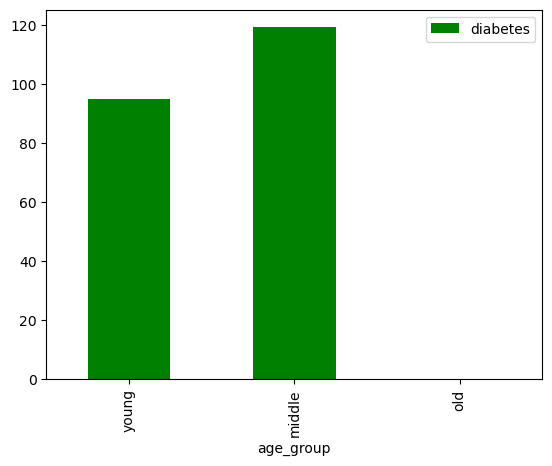

In [28]:
df.query('Outcome==1').groupby('age_group').mean().plot(y='Insulin',color='green',label='diabetes',kind='bar')

In [30]:
Non_Diabetes=df.query('Outcome==0').groupby('age_group').nunique()
Non_Diabetes

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
age_group,,,,,,,,,
young,14,100,39,45,131,194,327,21,1
middle,13,50,25,20,18,54,60,20,1
old,11,18,13,7,3,19,19,10,1


<Axes: xlabel='age_group'>

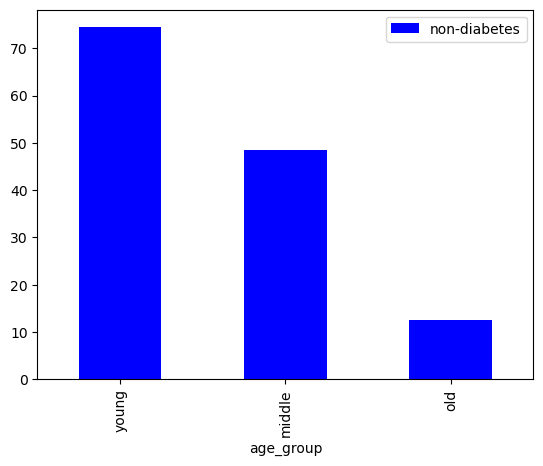

In [31]:
df.query('Outcome==0').groupby('age_group').mean().plot(y='Insulin',color='blue',label='non-diabetes',kind='bar')

Exercise 3

For this exercise, you should first start the Redis container without persistence.

Take the SQLite database called aminoacids_pubchem.sqlite which can be extracted from https://pubchem.ncbi.nlm.nih.gov/compound/Amino-acid_Tyr-_-Trp-_-Phe-_-Leu. This SQL database has a single table, called aminoacids, containing 20 aminoacids with some of their characteristics.

Write and then run code that does the following:

Read all the records of the DB into a pandas data frame.

The column called CID contains the Pubchem Compound identification number (CID) for each aminoacid. Loop through the CIDs and querying the REST endpoint https://pubchem.ncbi.nlm.nih.gov/rest/pug/compound/cid/XXX/property/MolecularWeight/JSON (replace XXX with the various CIDs), which returns output in JSON format, fetch the molecular weight for each aminoacid. Similarly, loop and query the REST endpoint https://pubchem.ncbi.nlm.nih.gov/rest/pug/compound/cid/XXX/property/IUPACName/JSON (replace XXX with the various CIDs), and fetch the corresponding IUPAC names.
Then, for each aminoacid, print its name as found in the SQLite database, its molecular weight (from the first REST call above and its IUPAC name (from the second REST call above). 
For instance, the output for Alanine should be Alanine 89.09 2-aminopropanoic acid

In a Redis database, create keys called ID:<NAME>, where <NAME> is the name of each aminoacid as found in the SQLite database. So, you should have keys called "ID:Alanine", "ID:Arginine", etc. The values associated to these keys should be a hash (a dictionary) that for each aminoacid stores polarity, hydrophobicity, weight, iupac name.
For instance, the key called "ID:Alanine" should map to the hash {polarity:0, hydro:1.8, weight:89.09, iupac:'2-aminopropanoic acid'}. 
Make sure you start with a Redis database with no initial keys.
When done, querying the Redis database, print all the info stored in Redis for the aminoacid Glutamate.


In [32]:
import sqlite3 as sql

# create a connection to the DB
# if the DB does not exist, it will be created
# verify that after this statement you now have the DB file on your system
conn = sql.connect('aminoacids_pubchem.sqlite')

In [33]:
cur = conn.cursor()

In [34]:
database_df = pd.read_sql_query('SELECT * FROM aminoacids', conn)
database_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   name      20 non-null     object 
 1   long      20 non-null     object 
 2   short     20 non-null     object 
 3   polarity  20 non-null     int64  
 4   hydro     20 non-null     float64
 5   CID       20 non-null     int64  
dtypes: float64(1), int64(2), object(3)
memory usage: 1.1+ KB


In [35]:
database_df.head()

,name,long,short,polarity,hydro,CID
0,Alanine,Ala,A,0,1.8,602
1,Arginine,Arg,R,1,-4.5,6322
2,Asparagine,Asn,N,1,-3.5,6267
3,Aspartate,Asp,D,1,-3.5,5960
4,Cysteine,Cys,C,0,2.5,594


In [36]:
database_df.shape #3.1 is finished it has 6 columns and 20 rows 

(20, 6)

In [37]:
cids = []
for element in database_df["CID"]:   #creating the list of cids
    cids.append(element)
print(cids)

[602, 6322, 6267, 5960, 594, 5961, 33032, 750, 6274, 6306, 6106, 5962, 876, 6140, 145742, 5951, 6288, 6305, 6057, 6287]


In [38]:
import requests
counter_3rd=0
amionacid_names_list=database_df['name']
for each in cids:                 #looping thrught cids
    r = requests.get("https://pubchem.ncbi.nlm.nih.gov/rest/pug/compound/cid/%s/property/MolecularWeight/JSON" %(each))
    s = requests.get("https://pubchem.ncbi.nlm.nih.gov/rest/pug/compound/cid/%s/property/IUPACName/JSON" %(each))
    data1=r.json()  #converting it into python dict
    data2=s.json()  #converting into python dict
    print(amionacid_names_list[counter_3rd],data1['PropertyTable']['Properties'][0]['MolecularWeight'],data2['PropertyTable']['Properties'][0]['IUPACName'])
    #extracting from python dict right values! and priting as it showed in example
    counter_3rd+=1 

Alanine 89.09 2-aminopropanoic acid
Arginine 174.20 (2S)-2-amino-5-(diaminomethylideneamino)pentanoic acid
Asparagine 132.12 (2S)-2,4-diamino-4-oxobutanoic acid
Aspartate 133.10 (2S)-2-aminobutanedioic acid
Cysteine 121.16 2-amino-3-sulfanylpropanoic acid
Glutamine 146.14 (2S)-2,5-diamino-5-oxopentanoic acid
Glutamate 147.13 (2S)-2-aminopentanedioic acid
Glycine 75.07 2-aminoacetic acid
Histidine 155.15 (2S)-2-amino-3-(1H-imidazol-5-yl)propanoic acid
Isoleucine 131.17 (2S,3S)-2-amino-3-methylpentanoic acid
Leucine 131.17 (2S)-2-amino-4-methylpentanoic acid
Lysine 146.19 (2S)-2,6-diaminohexanoic acid
Methionine 149.21 2-amino-4-methylsulfanylbutanoic acid
Phenylalanine 165.19 (2S)-2-amino-3-phenylpropanoic acid
Proline 115.13 (2S)-pyrrolidine-2-carboxylic acid
Serine 105.09 (2S)-2-amino-3-hydroxypropanoic acid
Threonine 119.12 (2S,3R)-2-amino-3-hydroxybutanoic acid
Tryptophan 204.22 (2S)-2-amino-3-(1H-indol-3-yl)propanoic acid
Tyrosine 181.19 (2S)-2-amino-3-(4-hydroxyphenyl)propanoic ac

In [40]:
! pip install redis
import redis
red= redis.Redis(host="my_redis", decode_responses=True)  #my redis is a docker container 
red.flushall()    #delete all keys
print(red.ping())  #checking if connection is okay

True


In [41]:
counter_4th=0
for each in cids:
    my_dict={}
    r = requests.get("https://pubchem.ncbi.nlm.nih.gov/rest/pug/compound/cid/%s/property/MolecularWeight/JSON" %(each))
    s = requests.get("https://pubchem.ncbi.nlm.nih.gov/rest/pug/compound/cid/%s/property/IUPACName/JSON" %(each))
    data1=r.json()  #converting it into python dict
    data2=s.json()  #converting into python dict                      
    my_dict["polarity"] = float(database_df["polarity"][counter_4th])                 #Extracting the needed data for polarity
    my_dict["hydrophobicity"] = float(database_df["hydro"][counter_4th])              #Extracting the needed data for hydropnicity
    my_dict["weight"] = float(data1["PropertyTable"]["Properties"][0]["MolecularWeight"])  
    my_dict["iupac"] = data2["PropertyTable"]["Properties"][0]["IUPACName"]
    print(my_dict)
    red.hset("ID:"+amionacid_names_list[counter_4th], mapping = my_dict)            #connecting ID:name key with dict! 
    counter_4th+=1                                                            
red.hgetall("ID:Glutamate")                          #checking if all information is mapped correctly

{'polarity': 0.0, 'hydrophobicity': 1.8, 'weight': 89.09, 'iupac': '2-aminopropanoic acid'}
{'polarity': 1.0, 'hydrophobicity': -4.5, 'weight': 174.2, 'iupac': '(2S)-2-amino-5-(diaminomethylideneamino)pentanoic acid'}
{'polarity': 1.0, 'hydrophobicity': -3.5, 'weight': 132.12, 'iupac': '(2S)-2,4-diamino-4-oxobutanoic acid'}
{'polarity': 1.0, 'hydrophobicity': -3.5, 'weight': 133.1, 'iupac': '(2S)-2-aminobutanedioic acid'}
{'polarity': 0.0, 'hydrophobicity': 2.5, 'weight': 121.16, 'iupac': '2-amino-3-sulfanylpropanoic acid'}
{'polarity': 1.0, 'hydrophobicity': -3.5, 'weight': 146.14, 'iupac': '(2S)-2,5-diamino-5-oxopentanoic acid'}
{'polarity': 1.0, 'hydrophobicity': -3.5, 'weight': 147.13, 'iupac': '(2S)-2-aminopentanedioic acid'}
{'polarity': 0.0, 'hydrophobicity': -0.4, 'weight': 75.07, 'iupac': '2-aminoacetic acid'}
{'polarity': 1.0, 'hydrophobicity': -3.2, 'weight': 155.15, 'iupac': '(2S)-2-amino-3-(1H-imidazol-5-yl)propanoic acid'}
{'polarity': 0.0, 'hydrophobicity': 4.5, 'weight'

{'polarity': '1.0',
 'hydrophobicity': '-3.5',
 'weight': '147.13',
 'iupac': '(2S)-2-aminopentanedioic acid'}